In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### Reading the Data

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### EDA

In [85]:
df["label"].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [21]:
df1 = df[df.columns[0:5]]
df1 = pd.concat([df1,df["label"]],axis=1)
df1.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'label'], dtype='object')

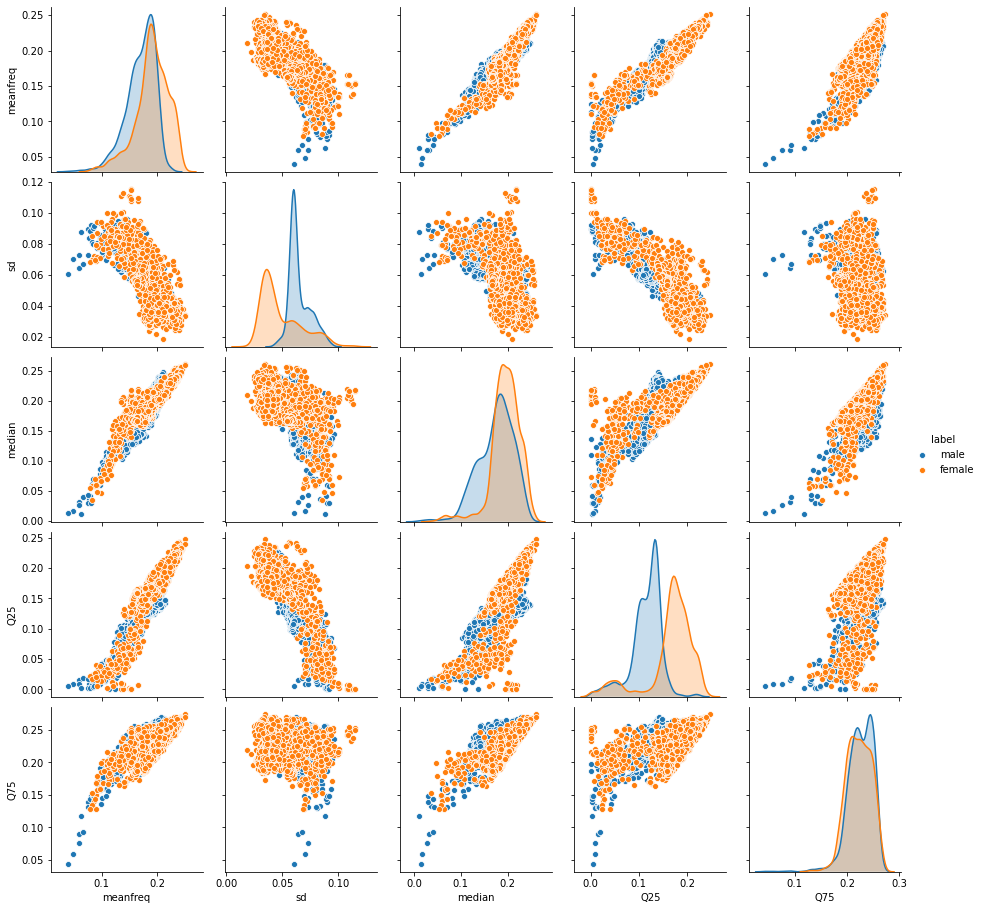

In [22]:
sns.pairplot(df1,hue="label")

In [23]:
df1 = df[df.columns[5:10]]
df1 = pd.concat([df1,df["label"]],axis=1)
df1.columns

Index(['IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'label'], dtype='object')

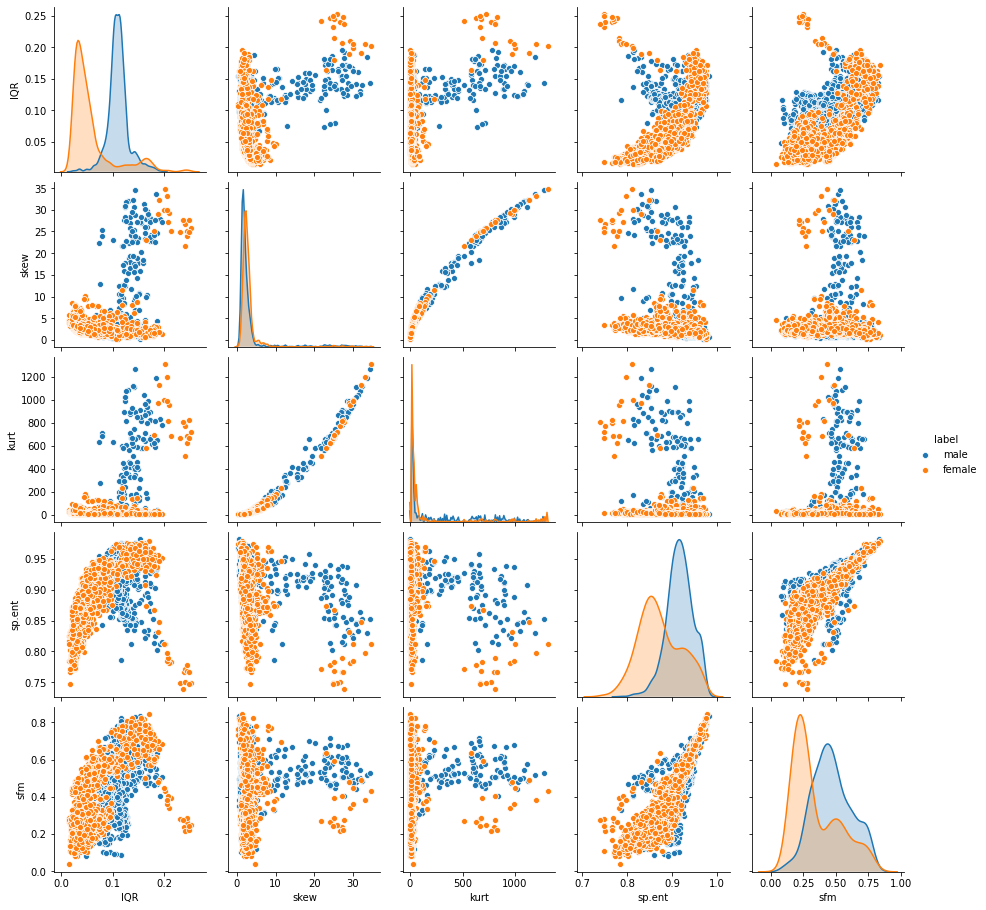

In [24]:
sns.pairplot(df1,hue="label")

In [27]:
df1 = df[df.columns[10:15]]
df1 = pd.concat([df1,df["label"]],axis=1)
df1.columns

Index(['mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'label'], dtype='object')

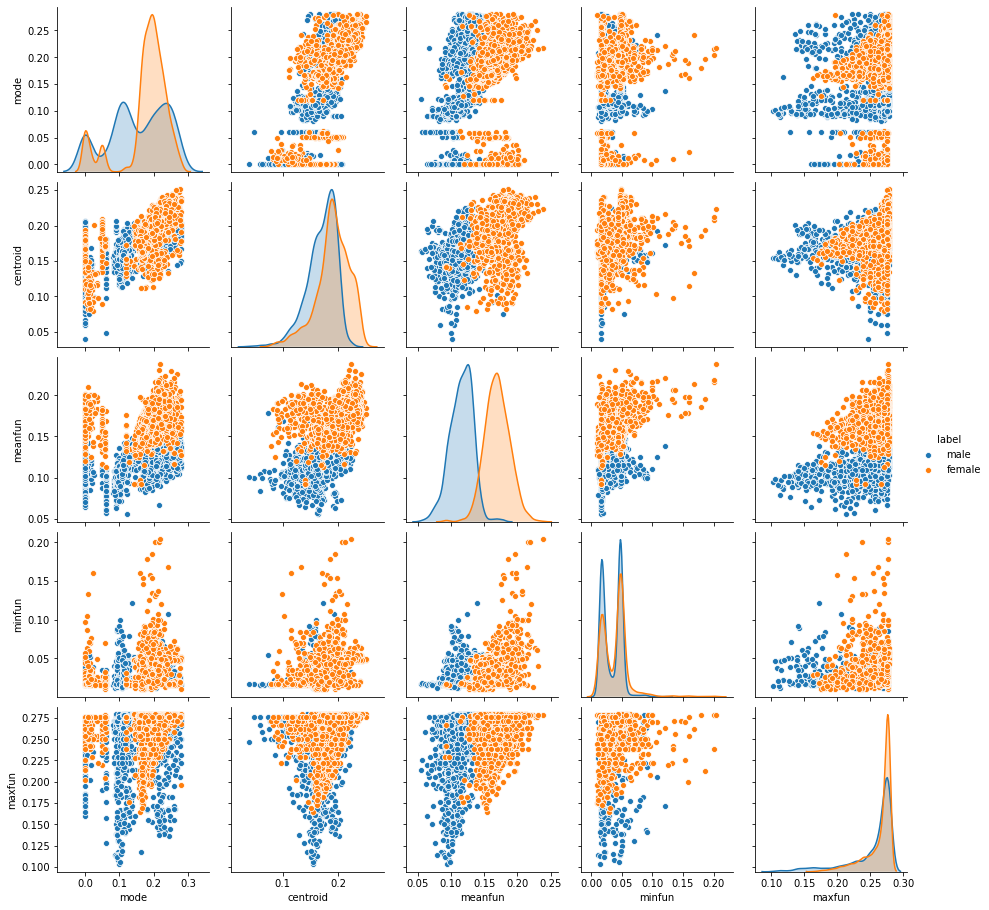

In [28]:
sns.pairplot(df1,hue="label")

In [29]:
df1 = df[df.columns[15:]]
df1.columns

Index(['meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'], dtype='object')

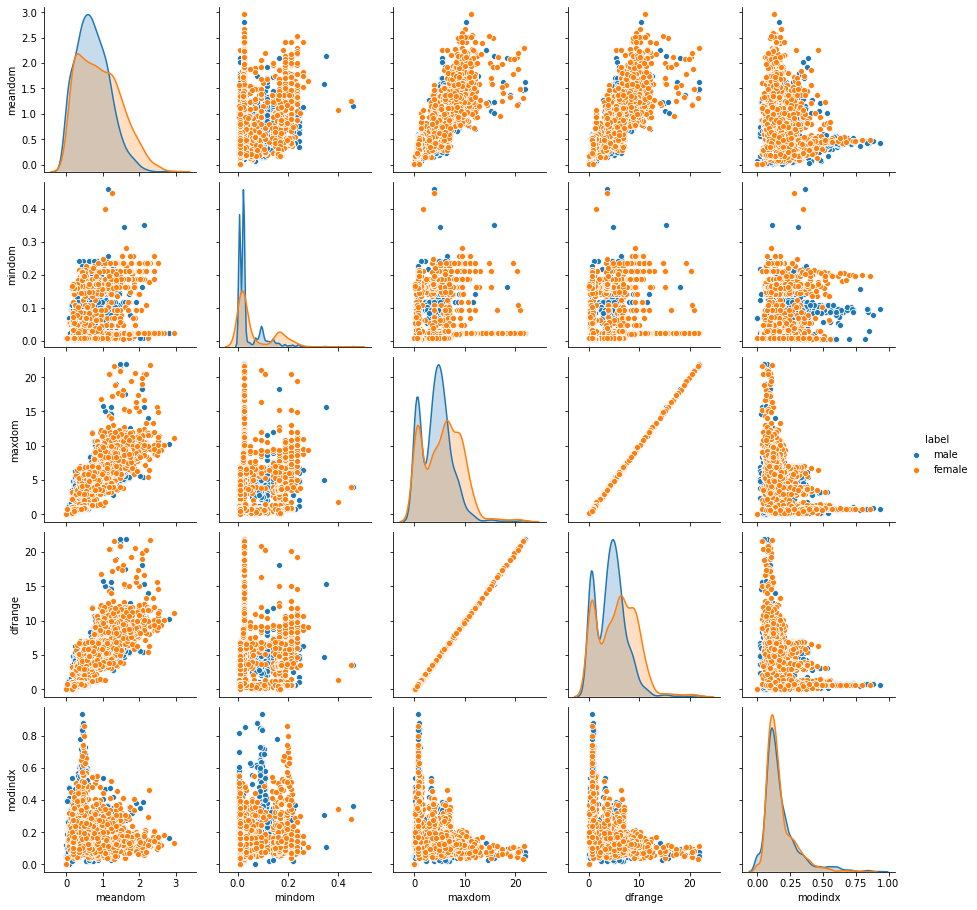

In [30]:
sns.pairplot(df1,hue="label")

In [44]:
X = df.drop(['label'],axis=1)
y = df["label"].map({'male':0,'female':1})

### Data preprocessing

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
sc.fit(X)

StandardScaler()

In [48]:
X = sc.transform(X)

### Trian Test Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state = 101)

In [52]:
from sklearn.svm import SVC

In [53]:
model = SVC()

In [54]:
model.fit(X_train,y_train)

SVC()

In [56]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
print(confusion_matrix(y_pred,y_test))

[[476   8]
 [ 12 455]]


In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       484
           1       0.98      0.97      0.98       467

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



### Using GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_list = [{'C':[1,1.5,1.75,1.8,1.9,2],'gamma':[0.1,0.2,0.5,1],'kernel': ['rbf','linear','poly']}]

In [79]:
grid = GridSearchCV(SVC(),param_list,n_jobs=2,verbose=2)

In [80]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=SVC(), n_jobs=2,
             param_grid=[{'C': [1, 1.5, 1.75, 1.8, 1.9, 2],
                          'gamma': [0.1, 0.2, 0.5, 1],
                          'kernel': ['rbf', 'linear', 'poly']}],
             verbose=2)

In [81]:
grid.best_params_

{'C': 1.75, 'gamma': 0.2, 'kernel': 'rbf'}

In [82]:
y_pred = grid.predict(X_test)

In [83]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       481
           1       0.98      0.97      0.98       470

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [84]:
print(confusion_matrix(y_pred,y_test))

[[474   7]
 [ 14 456]]
